# Projeto

In [192]:
import pandas as pd

## Data Profiling

In [193]:
from pandas import DataFrame

filename = 'class_credit_score.csv'
file_tag = 'credit_score'
dataset: DataFrame = pd.read_csv(filename, index_col='ID', sep=',', decimal='.', na_values='')

dataset.shape

(100000, 27)

### Data Dimensionality

#### Figure 1 Nr Records x Nr variables

*vale a pena experimentar com outros tipos de gráficos???*
- nao ha curse of dimensionality

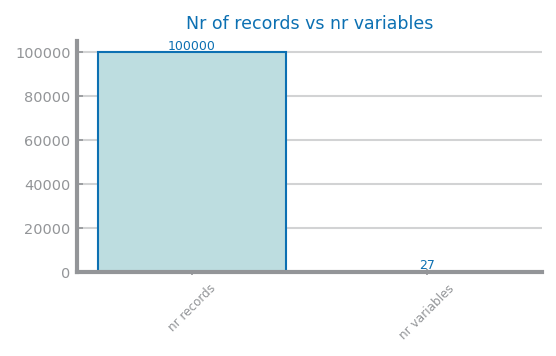

In [194]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": dataset.shape[0], "nr variables": dataset.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title="Nr of records vs nr variables"
)
savefig(f"images/fig_1_records_variables.png")
show()

#### Figure 2 mr variables per type

*Podemos confiar na funcao get_variable_types ou temos de rever e trocar os tipos de dados se for preciso*

In [195]:
dataset.dtypes

Customer_ID                object
Month                      object
Name                       object
Age                        object
SSN                        object
Occupation                 object
Annual_Income             float64
Monthly_Inhand_Salary     float64
Num_Bank_Accounts           int64
Num_Credit_Card             int64
Interest_Rate               int64
NumofLoan                   int64
Type_of_Loan               object
Delay_from_due_date         int64
NumofDelayedPayment       float64
ChangedCreditLimit        float64
NumCreditInquiries        float64
CreditMix                  object
OutstandingDebt           float64
CreditUtilizationRatio    float64
Credit_History_Age         object
Payment_of_Min_Amount      object
TotalEMIpermonth          float64
Amountinvestedmonthly     float64
Payment_Behaviour          object
MonthlyBalance            float64
Credit_Score               object
dtype: object

{'numeric': ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'NumofLoan', 'Delay_from_due_date', 'NumofDelayedPayment', 'ChangedCreditLimit', 'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio', 'TotalEMIpermonth', 'Amountinvestedmonthly', 'MonthlyBalance'], 'binary': ['Credit_Score'], 'date': [], 'symbolic': ['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Type_of_Loan', 'CreditMix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour']}


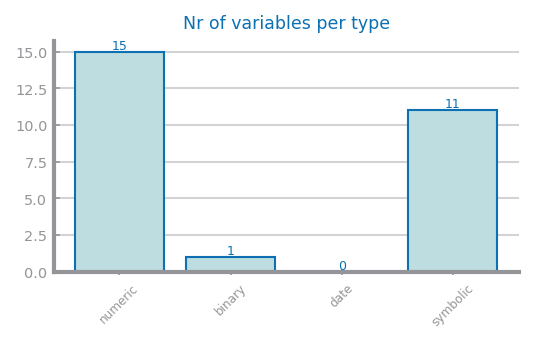

In [196]:
from dslabs_functions import get_variable_types

variable_types: dict[str, list] = get_variable_types(dataset)
print(variable_types)

counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title="Nr of variables per type"
)
savefig(f"images/fig_2_variable_types.png")
show()

In [197]:
#binary: list[str] = variable_types["binary"]
#print(binary)

*Mudar de 'Good' && 'Poor' para 1 && 0*

In [198]:
symbolic: list[str] = variable_types["symbolic"]
dataset[symbolic] = dataset[symbolic].apply(lambda x: x.astype("category"))

# Mudar Credit_Score object para binary como na funçao aplicada acima
# é a unica que diz object
#object: list[str] = variable_types["binary"]
#dataset['Credit_Score'] = dataset['Credit_Score'].map({'Good': 1, 'Poor': 0})

dataset.dtypes

Customer_ID               category
Month                     category
Name                      category
Age                       category
SSN                       category
Occupation                category
Annual_Income              float64
Monthly_Inhand_Salary      float64
Num_Bank_Accounts            int64
Num_Credit_Card              int64
Interest_Rate                int64
NumofLoan                    int64
Type_of_Loan              category
Delay_from_due_date          int64
NumofDelayedPayment        float64
ChangedCreditLimit         float64
NumCreditInquiries         float64
CreditMix                 category
OutstandingDebt            float64
CreditUtilizationRatio     float64
Credit_History_Age        category
Payment_of_Min_Amount     category
TotalEMIpermonth           float64
Amountinvestedmonthly      float64
Payment_Behaviour         category
MonthlyBalance             float64
Credit_Score                object
dtype: object

#### Figure 3 Nr missing values for dataset

*Como escolher MV que nao sao realmente Missing Values*

In [199]:
mv = {}

for var in dataset.columns:
    nr = dataset[var].isna().sum()
    print(var + " - " + str(nr))
    if nr > 0:
        mv[var] = nr

Customer_ID - 0
Month - 0
Name - 9985
Age - 0
SSN - 5572
Occupation - 7062
Annual_Income - 0
Monthly_Inhand_Salary - 15002
Num_Bank_Accounts - 0
Num_Credit_Card - 0
Interest_Rate - 0
NumofLoan - 0
Type_of_Loan - 11408
Delay_from_due_date - 0
NumofDelayedPayment - 7002
ChangedCreditLimit - 2091
NumCreditInquiries - 1965
CreditMix - 20195
OutstandingDebt - 0
CreditUtilizationRatio - 0
Credit_History_Age - 9030
Payment_of_Min_Amount - 0
TotalEMIpermonth - 0
Amountinvestedmonthly - 4479
Payment_Behaviour - 7600
MonthlyBalance - 1200
Credit_Score - 0


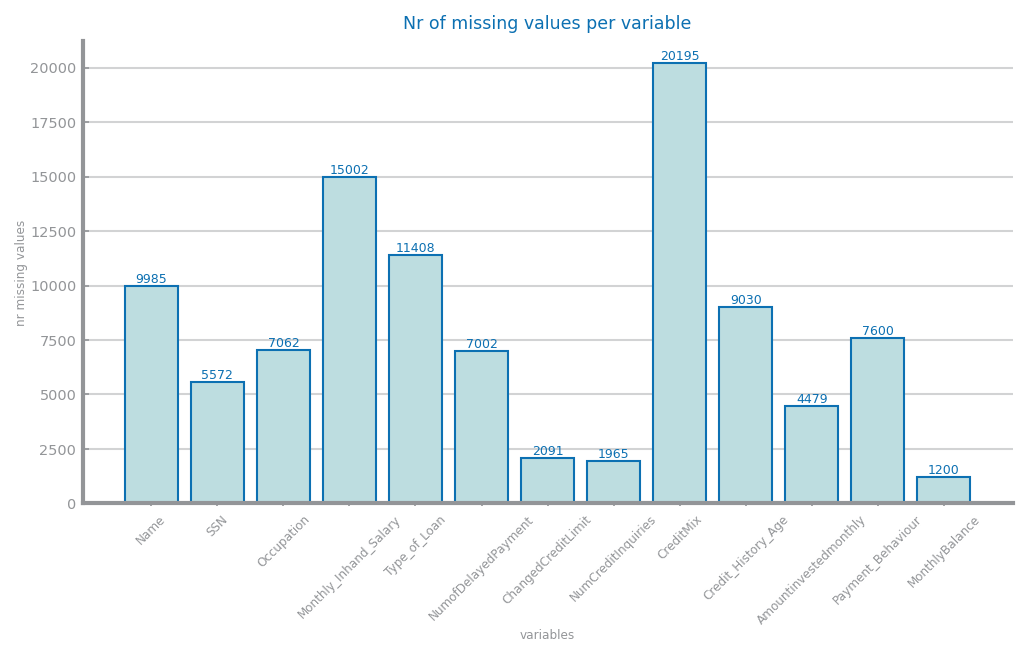

In [200]:
mv: dict[str, int] = {}

for var in dataset.columns:
    nr: int = dataset[var].isna().sum()
    if nr > 0:
        mv[var] = nr

figure(figsize=(8, 4))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
savefig(f"images/figure_3_mv.png")
show()

*O que esta mal feito nas percentagens????*

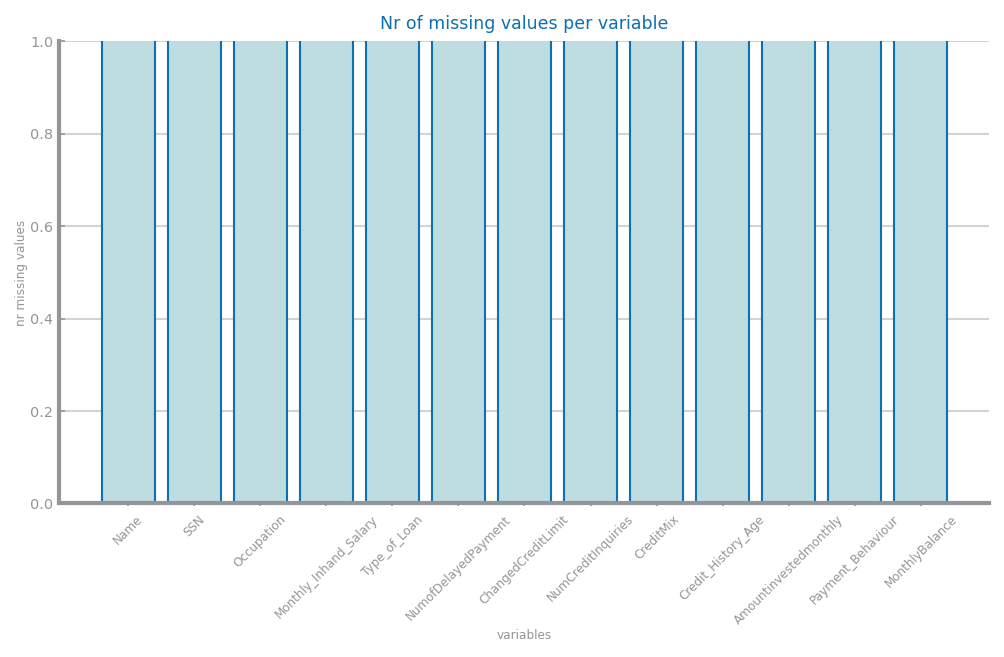

In [201]:
mv: dict[str, int] = {}
for var in dataset.columns:
    nr: int = dataset[var].isna().sum()
    percentage = (nr / len(dataset[var])) * 100
    if nr > 0:
        mv[var] = percentage

figure(figsize=(8, 4))
plot_bar_chart(
    list(mv.keys()),
    list(mv.values()),
    title="Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
    percentage=True
)
savefig(f"images/figure_3_mv_percentages.png")
show()

### Data Distribution

In [202]:
summary5: DataFrame = dataset.describe(include='all')
summary5

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,Credit_History_Age,Payment_of_Min_Amount,TotalEMIpermonth,Amountinvestedmonthly,Payment_Behaviour,MonthlyBalance,Credit_Score
count,100000,100000,90015,100000,94428,92938,1.000000e+05,84998.000000,100000.000000,100000.00000,...,79805,100000.000000,100000.000000,90970,100000,100000.000000,95521.000000,92400,9.880000e+04,100000
unique,12500,8,10139,1788,12500,15,NaN,NaN,NaN,NaN,...,3,NaN,NaN,404,3,NaN,NaN,6,NaN,2
top,CUS_0x1000,April,Langep,38,000-08-1349,Lawyer,NaN,NaN,NaN,NaN,...,Standard,NaN,NaN,15 Years and 11 Months,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Good
freq,8,12500,44,2833,8,6575,NaN,NaN,NaN,NaN,...,36479,NaN,NaN,446,52326,NaN,NaN,25513,NaN,71002
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.764157e+05,4194.170850,17.091280,22.47443,...,NaN,1426.220376,32.285173,NaN,NaN,1403.118217,637.412998,NaN,-3.036434e+22,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.429618e+06,3183.686167,117.404834,129.05741,...,NaN,1155.129026,5.116875,NaN,NaN,8306.041270,2043.319327,NaN,3.181292e+24,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.00000,...,NaN,0.230000,20.000000,NaN,NaN,0.000000,0.000000,NaN,-3.333330e+26,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.945750e+04,1625.568229,3.000000,4.00000,...,NaN,566.072500,28.052567,NaN,NaN,30.306660,74.534002,NaN,2.700922e+02,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.757861e+04,3093.745000,6.000000,5.00000,...,NaN,1166.155000,32.305784,NaN,NaN,69.249473,135.925681,NaN,3.367192e+02,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.279092e+04,5957.448333,7.000000,7.00000,...,NaN,1945.962500,36.496663,NaN,NaN,161.224249,265.731733,NaN,4.702202e+02,NaN


#### Figure 4 Global Boxplots

*Não nos dá informação quase nenhuma*

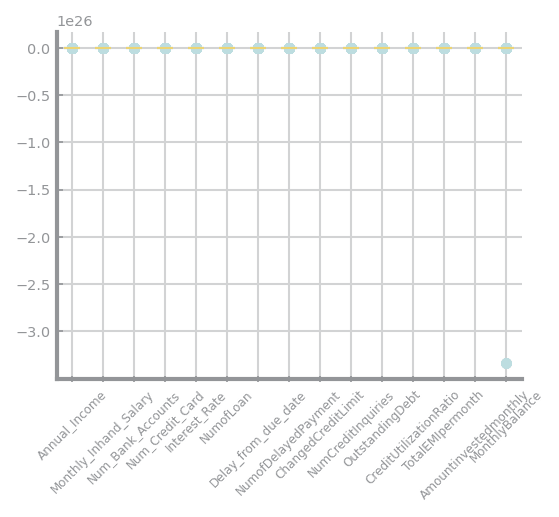

In [203]:
from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(dataset)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    dataset[numeric].boxplot(rot=45)
    savefig(f"images/fig_4_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

*Global boxplot sem a variavel Anual Income & Monthly Balance & Total EMI per month*

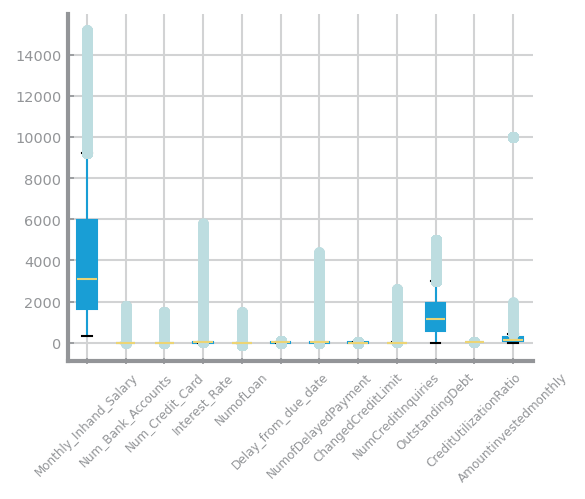

In [204]:
from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types

variables_types: dict[str, list] = get_variable_types(dataset)
numeric: list[str] = variables_types["numeric"]
if [] != numeric:
    excluded_indices = {0, len(numeric) - 1, len(numeric) - 3}
    numeric_excluded = [var for idx, var in enumerate(numeric) if idx not in excluded_indices]
    dataset[numeric_excluded].boxplot(rot=45)
    savefig(f"images/fig_4_global_boxplot_without_3_vars.png")
    show()
else:
    print("There are no numeric variables.")

#### Figure 6 Singe Variable Boxplots

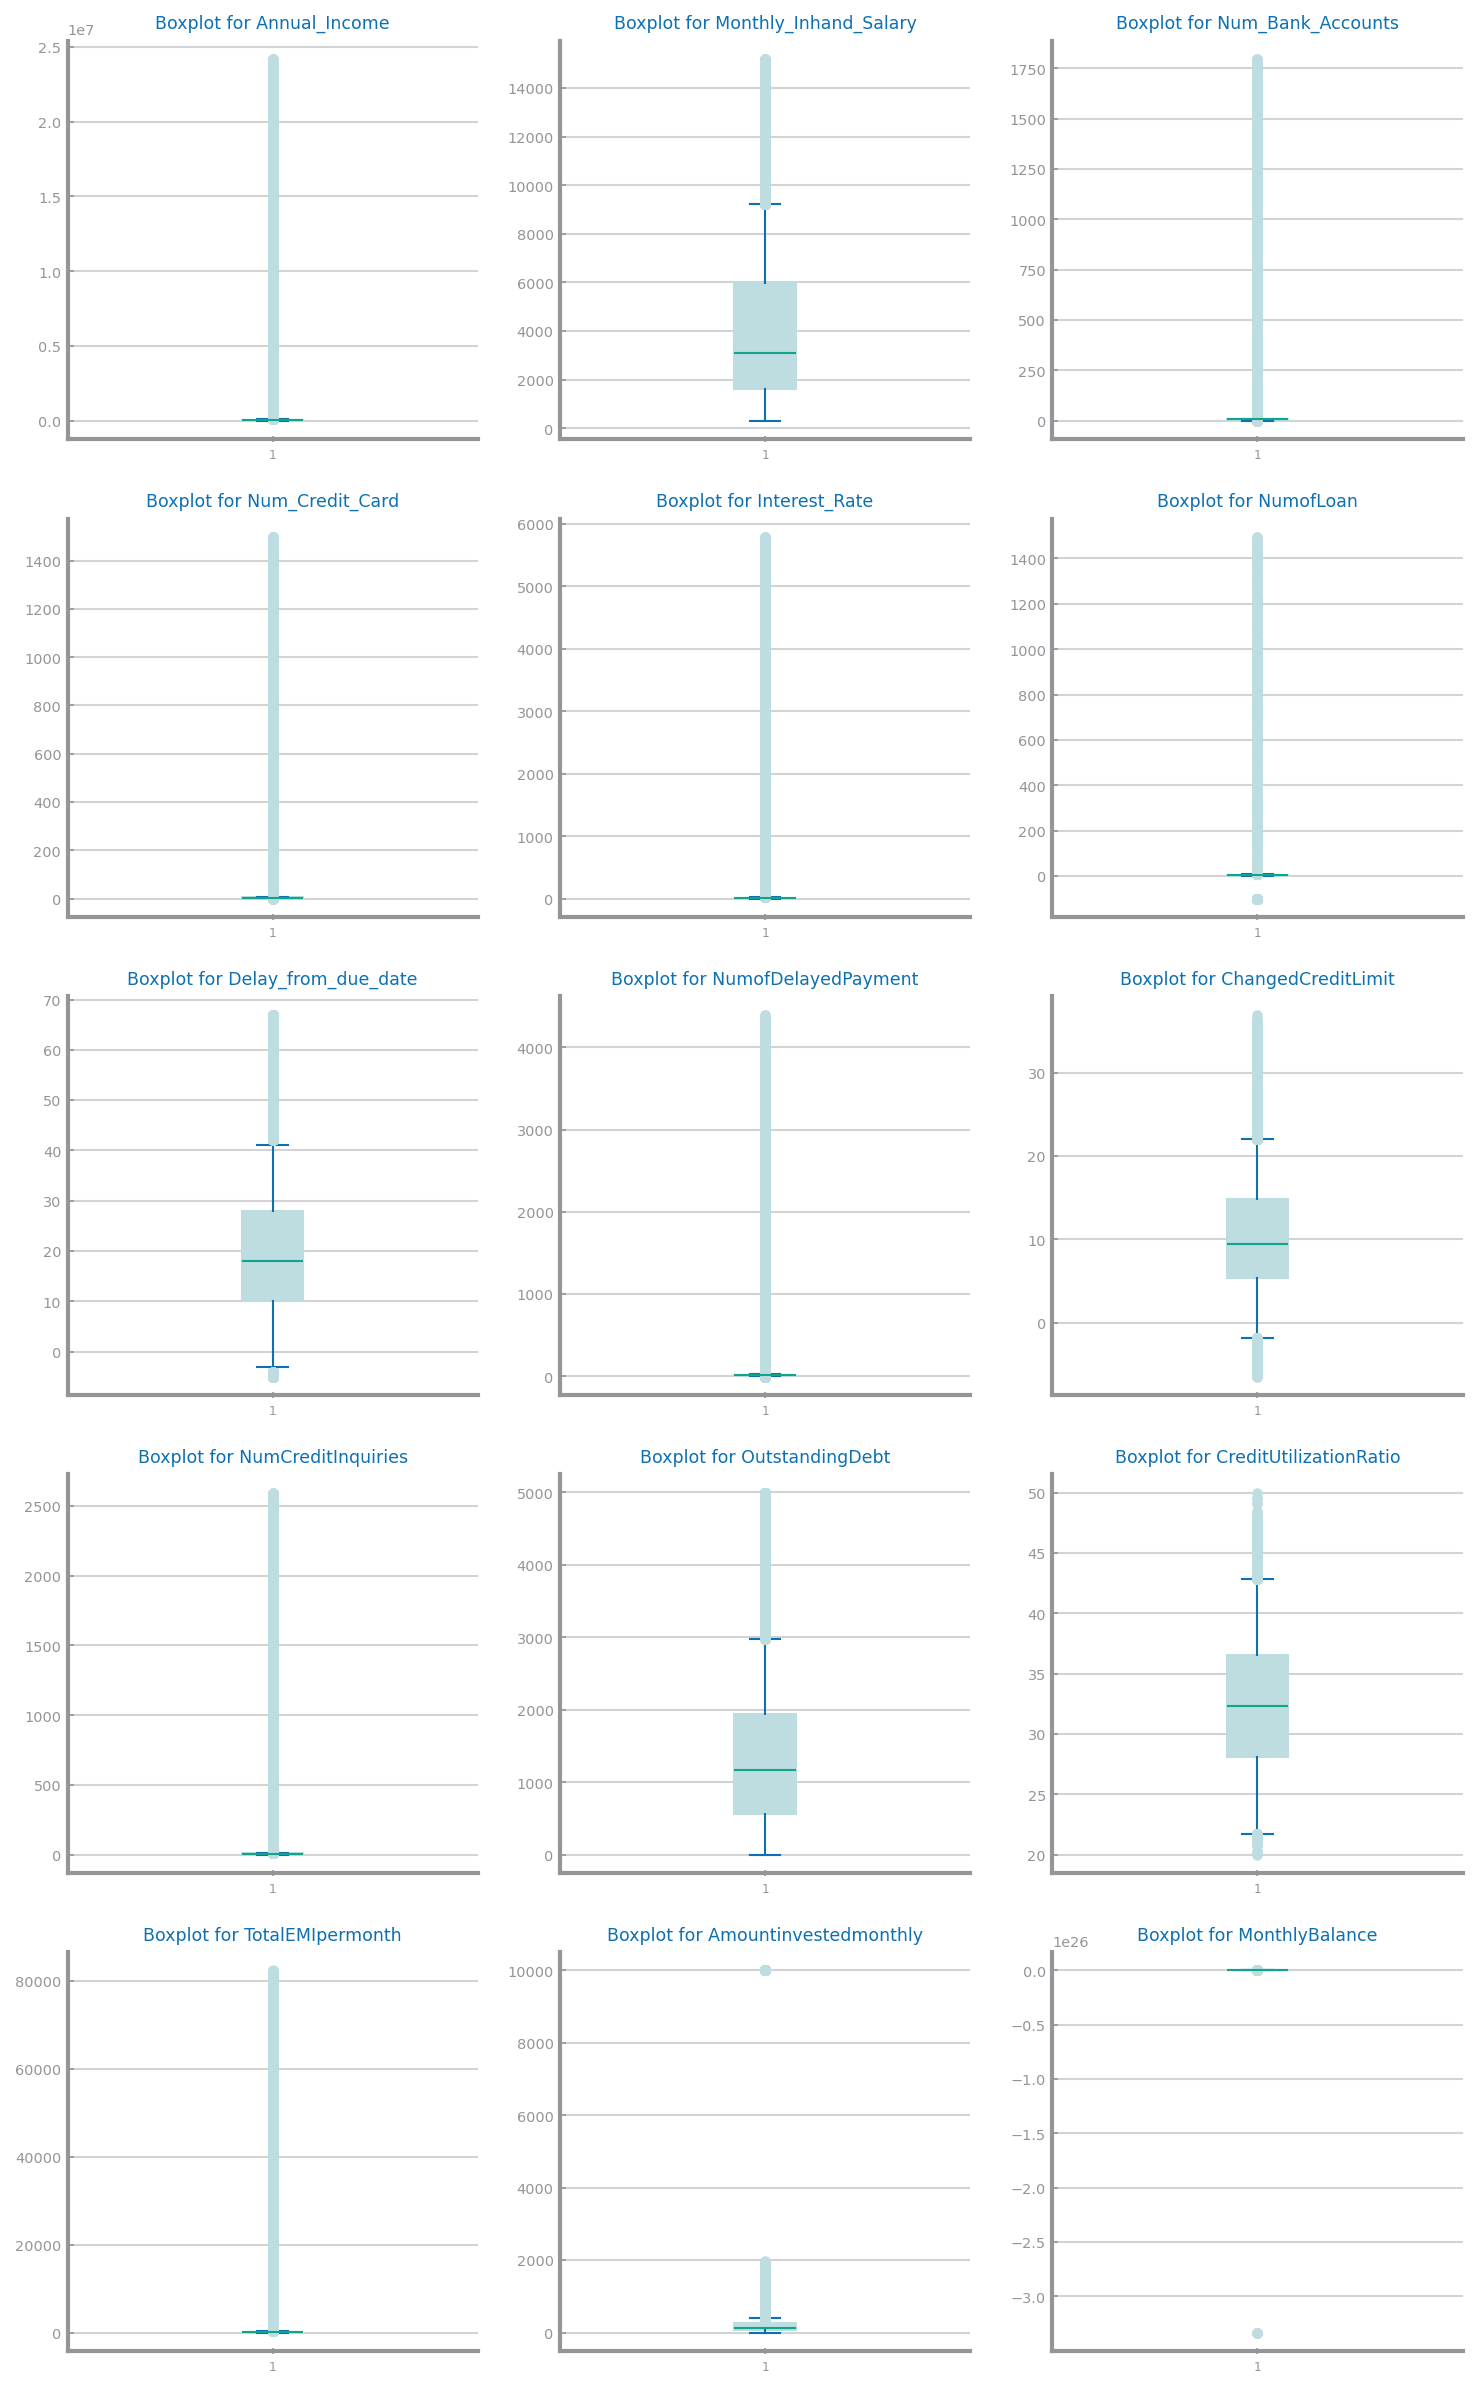

In [205]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(dataset[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/fig_6_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

*MonthlyBalance Missing Values removed to analyse the Boxplot better// Faz sentido? Fazer o mesmo para outras?*

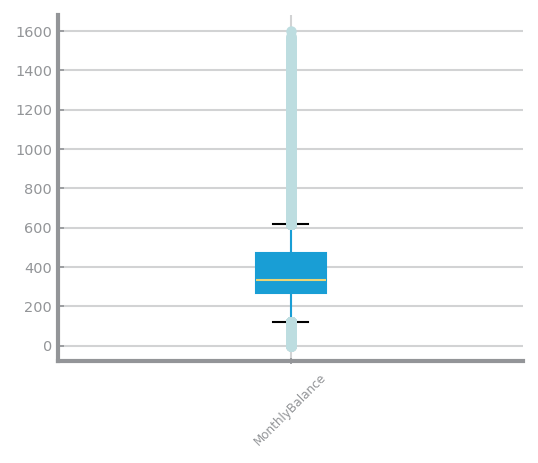

In [206]:
import numpy as np
from matplotlib.pyplot import savefig, show
from dslabs_functions import get_variable_types

monthly_bal = ["MonthlyBalance"]
if monthly_bal:
    dataset_copy = dataset.copy()

    dataset_copy[monthly_bal] = dataset_copy[monthly_bal].replace(-3.33333E+26, np.nan)

    dataset_copy[monthly_bal].boxplot(rot=45)
    savefig(f"images/fig_6_monthly_bal_only_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

#### Figure 8 Histograms

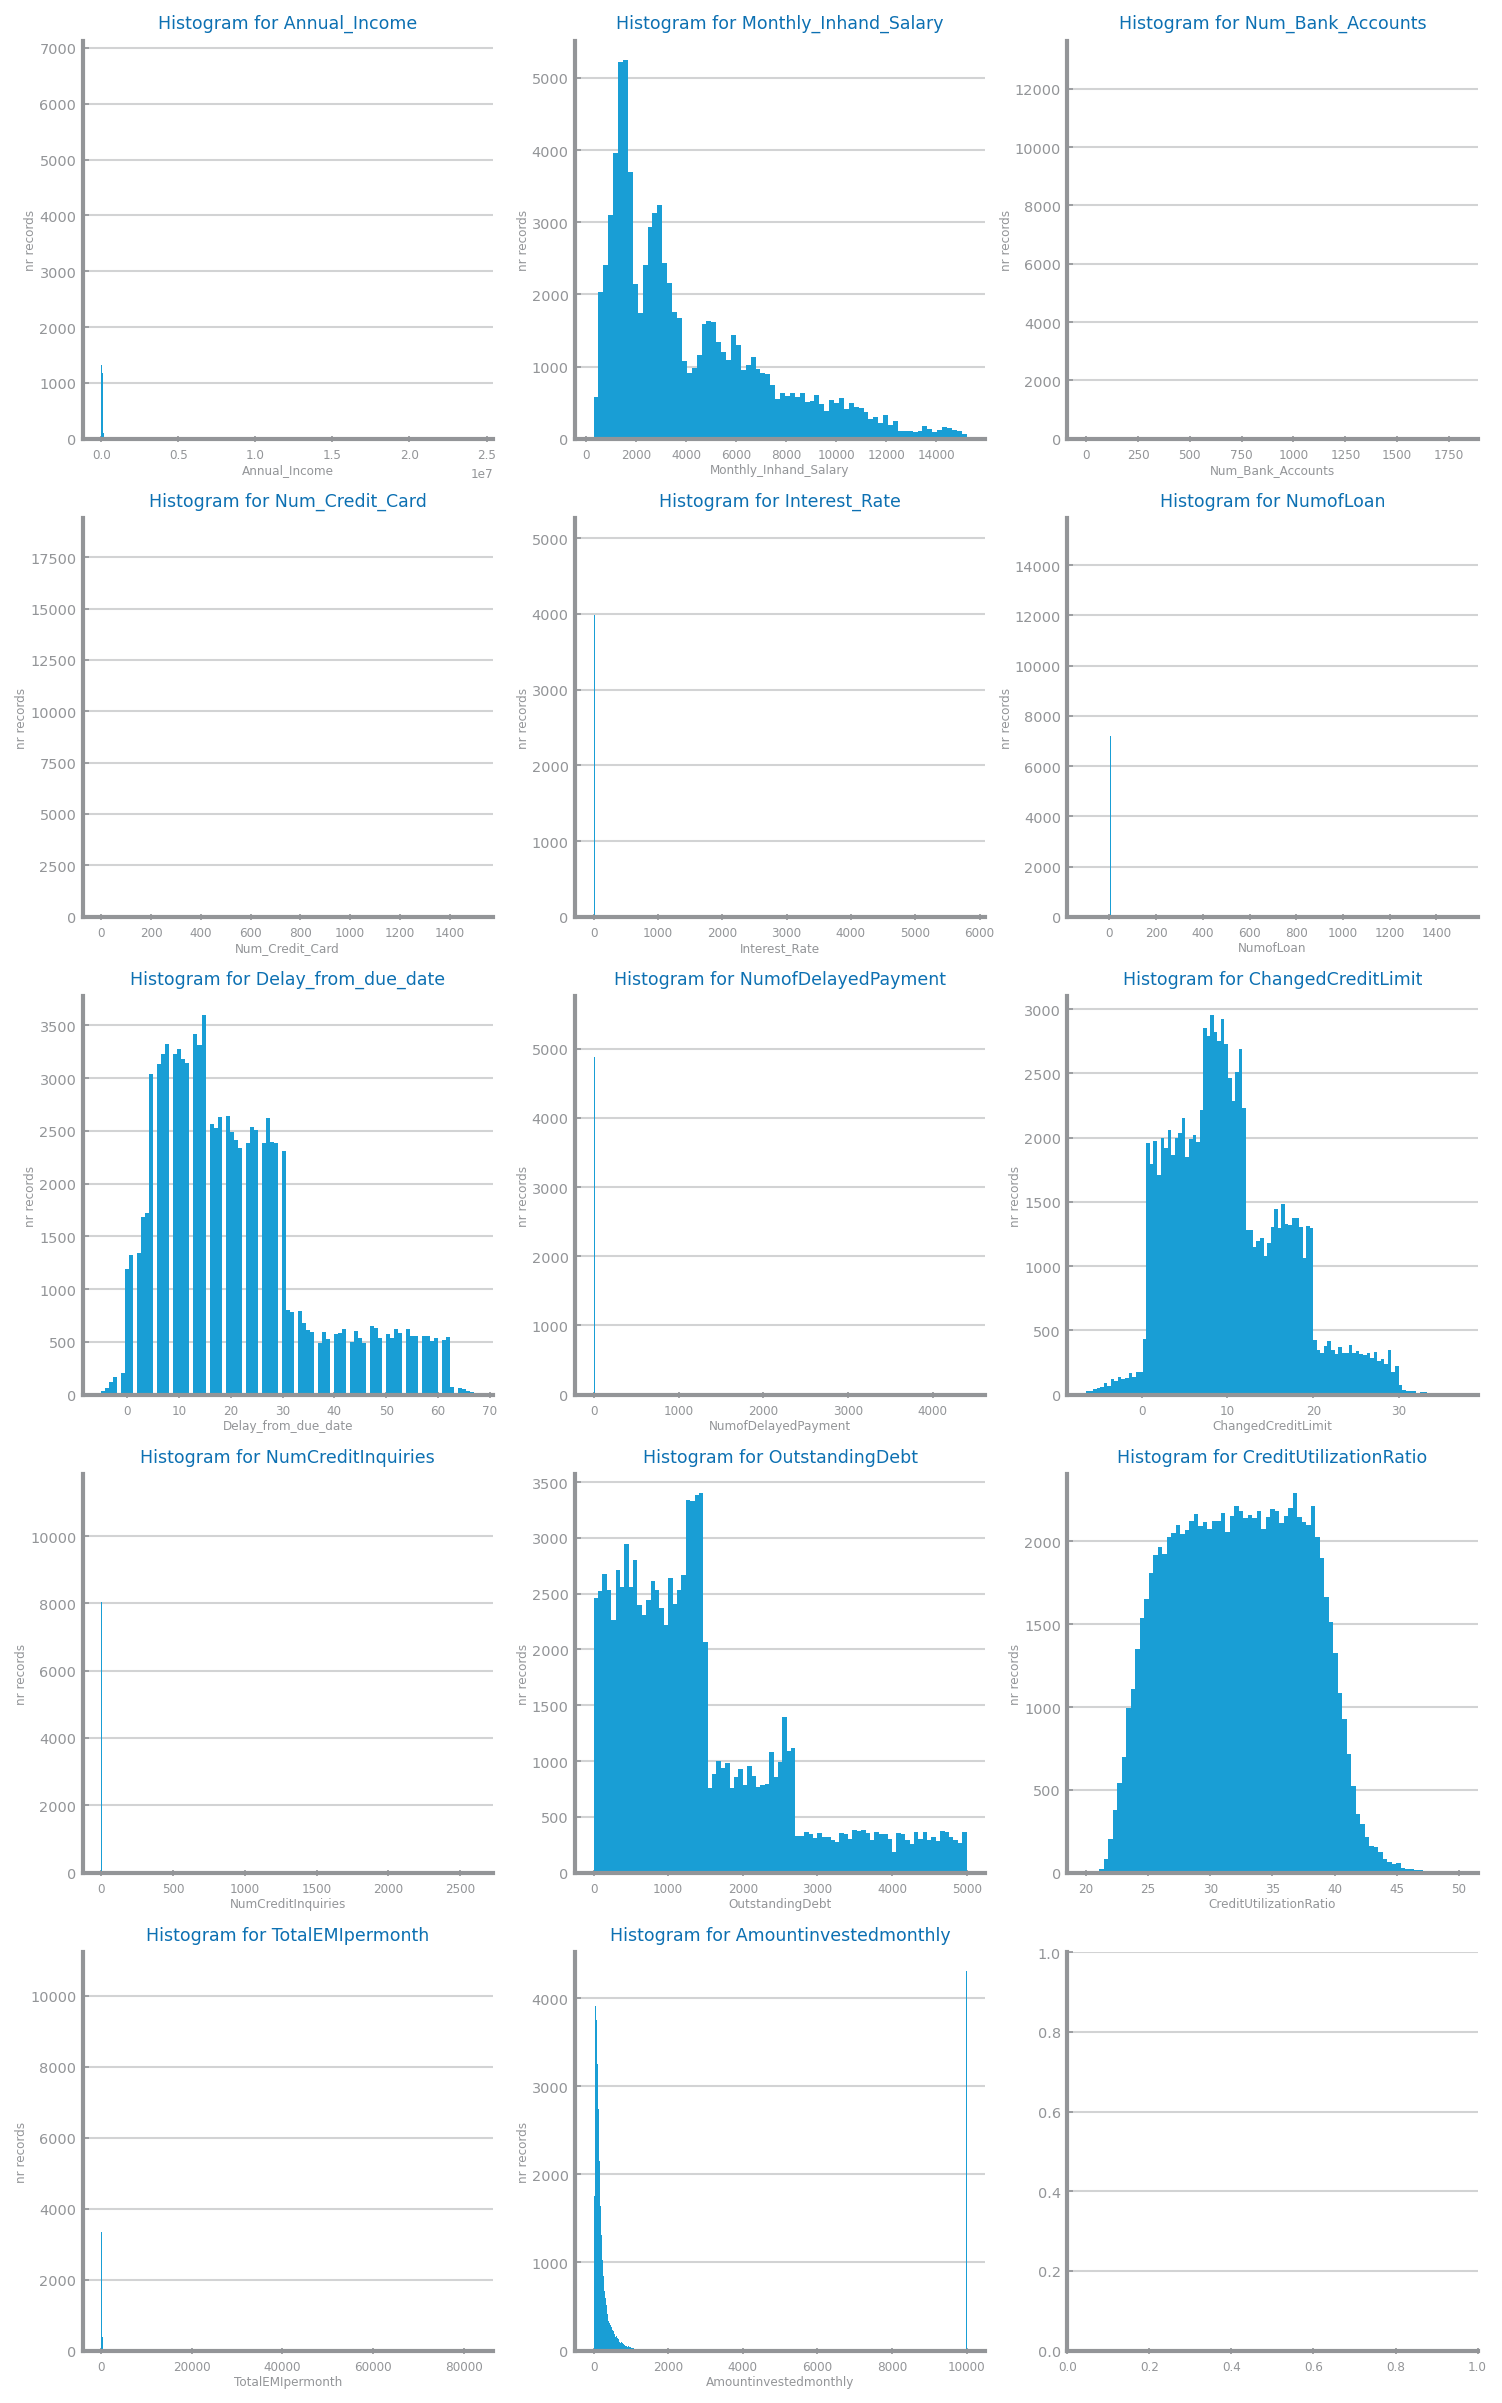

In [207]:
from dslabs_functions import set_chart_labels

if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i: int
    j: int
    i, j = 0, 0
    for n in range(len(numeric)-1):
        set_chart_labels(
            axs[i, j],
            title=f"Histogram for {numeric[n]}",
            xlabel=numeric[n],
            ylabel="nr records",
        )
        axs[i, j].hist(dataset[numeric[n]].dropna().values, "auto")
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/fig_8_single_histograms_numeric_1.png")
    show()

#### Figure 10 Outlier Study

#### Figure 12 Class Distribution